In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

<h4> Merge data from all English Premier League seasons for the past 10 years (2010/11 - 2019/20 season)

In [2]:
#Here we merge the data from number of CSV files from the past 10 seasons of the English Premier League
all_seasons = pd.DataFrame()
files = [file for file in os.listdir('/Users/figaero/Desktop/EPL_Data')]

for file in files:
    df = pd.read_csv('/Users/figaero/Desktop/EPL_Data/'+file)
    all_seasons = pd.concat([all_seasons, df])

all_seasons.to_csv('all_data.csv', index=False)


In [3]:
#Read data in as a DataFrame
all_data = pd.read_csv('all_data.csv')
all_data = all_data.dropna(axis=1,how='any')

<h4>Augment data with additional column

TABLE LEGENDS:

Season = Premiere league season

HomeTeam = Team playing on home ground

AwayTeam = Team playing away from home

FTHG = Full time home team goals

FTAG = Full time away team goals

FTR = Full time results (H = Home team win, A = Away team win, D = Draw/Tie)

Referee = Referee name

HF = Total number of fouls by home team in game

AF = Total number of fouls by away team in game

HY = Total number of yellow cards given to home team in game (Warning card)

AY = Total number of yellow cards given to away team in game (Warning card)

HR = Total number of red cards given to home team in game (Dismissal card)

AR = Total number of red cards given to away team in game (Dismissal card)

TR = Total number of red cards given in the game (Dismissal card)

TY = Total number of yellow cards given in the game (Warning card)

TG = Total number of goals scored in the game

TF = Total number of fouls called in the game

In [4]:
#Added some extra columns needed for analysis
all_data['TR'] = all_data['HR'] + all_data['AR']
all_data['TY'] = all_data['HY'] + all_data['AY']
all_data['TG'] = all_data['FTHG'] + all_data['FTAG']
all_data['TF'] = all_data['HF'] + all_data['AF']

#Changed the column type to allow for better data analysis
all_data['TR'] = all_data['TR'].astype(int)
all_data['TY'] = all_data['TY'].astype(int)
all_data['TG'] = all_data['TG'].astype(int)
all_data['TF'] = all_data['TF'].astype(int)
all_data['FTHG'] = all_data['FTHG'].astype(int)
all_data['FTAG'] = all_data['FTAG'].astype(int)
all_data['HF'] = all_data['HF'].astype(int)
all_data['AF'] = all_data['AF'].astype(int)
all_data['HY'] = all_data['HY'].astype(int)
all_data['AY'] = all_data['AY'].astype(int)
all_data['HR'] = all_data['HR'].astype(int)
all_data['AR'] = all_data['AR'].astype(int)

In [5]:
#Preview data
all_data.head(5)

,season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,TR,TY,TG,TF
0,18_season,Man United,Leicester,2,1,H,A Marriner,11,8,2,1,0,0,0,3,3,19
1,18_season,Bournemouth,Cardiff,2,0,H,K Friend,11,9,1,1,0,0,0,2,2,20
2,18_season,Fulham,Crystal Palace,0,2,A,M Dean,9,11,1,2,0,0,0,3,2,20
3,18_season,Huddersfield,Chelsea,0,3,A,C Kavanagh,9,8,2,1,0,0,0,3,3,17
4,18_season,Newcastle,Tottenham,1,2,A,M Atkinson,11,12,2,2,0,0,0,4,3,23


<h4>Question 1: How many games did each referee take charge in and which referee's presided over the top 10 most number of games.

To avoid skewing the data, we will work with referees who have taken charge of over 20 games, then show the top 10 referees

In [6]:
#Removed data with referees that have overseen less than 20 games
data = all_data.groupby('Referee').filter(lambda x: len(x)>20)
ref_data = data.groupby('Referee')

#For the total number of games the referees in the league have overseen over the past 10 seasons
all_refs = dict(data['Referee'].value_counts())

#For the referees with the top 10 most appearances 
top_refs = dict(data['Referee'].value_counts().head(10))

In [7]:
for key in sorted(top_refs):
    print('{} - {} games'.format(key,top_refs[key]))

A Marriner - 238 games
A Taylor - 242 games
J Moss - 212 games
K Friend - 204 games
L Mason - 207 games
M Atkinson - 269 games
M Clattenburg - 175 games
M Dean - 275 games
M Jones - 170 games
M Oliver - 253 games


<h4> Question 2: Which referee gave the most foul and the most yellow cards per game

As yellow cards more represent the general direction or happenings in a game, we will use that instead of red cards as those are usually outliers in games due to their unpredictablility.

In [8]:
#Breaking down the data to get the average of the variables we need to answer this question
avg_fouls = ref_data.agg({'TF': ['mean']}).round(2)
avg_fouls_home = ref_data.agg({'HF': ['mean']}).round(2)
avg_fouls_away = ref_data.agg({'AF': ['mean']}).round(2)
avg_yellow_card = ref_data.agg({'TY': ['mean']}).round(2)
avg_home_yellow_card = ref_data.agg({'HY': ['mean']}).round(2)
avg_away_yellow_card = ref_data.agg({'AY': ['mean']}).round(2)

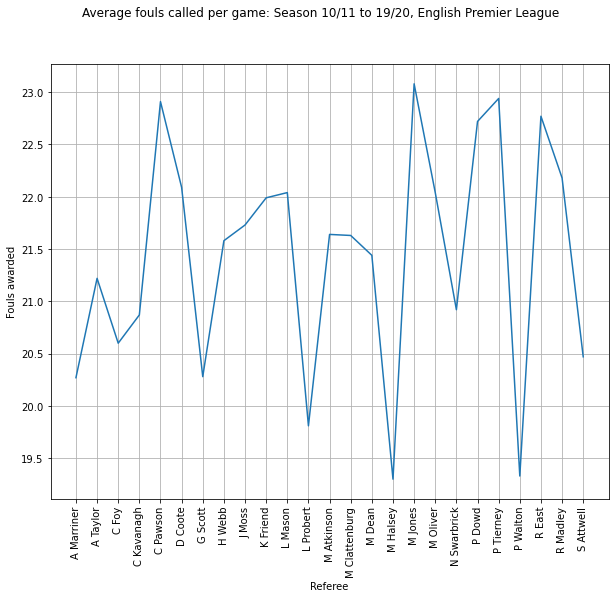

In [9]:
#Plotting the graph for the average fouls called per game by each referee
plt.figure(num=None, figsize=(10, 8), edgecolor='k')
plt.plot(avg_fouls)
plt.suptitle('Average fouls called per game: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Fouls awarded')
plt.grid(True)

plt.show()

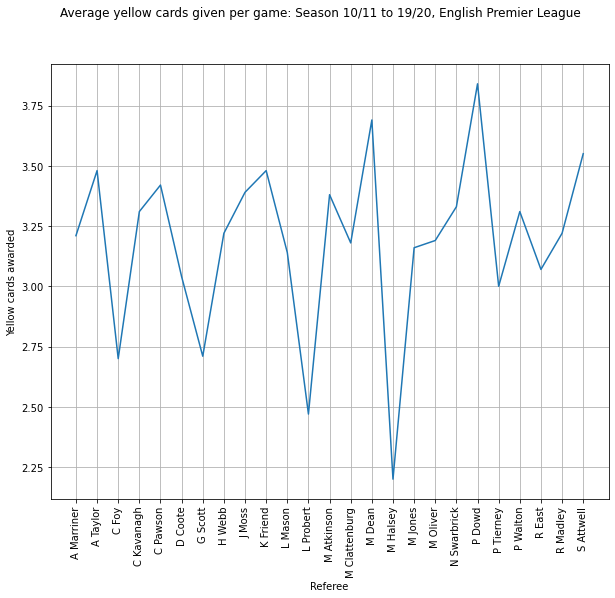

In [10]:
#Plotting the graph for the average number of yellow card given per game by each referee
plt.figure(num=None, figsize=(10, 8), edgecolor='k')
plt.plot(avg_yellow_card)
plt.suptitle('Average yellow cards given per game: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Yellow cards awarded')
plt.grid(True)
plt.show()

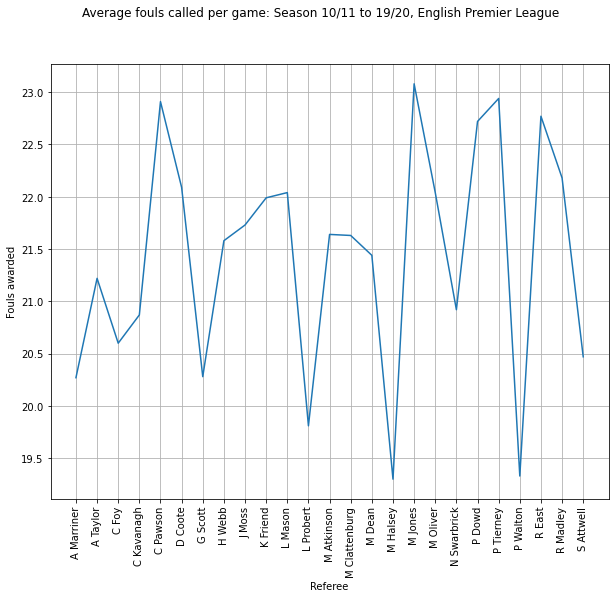

In [11]:
plt.figure(num=None, figsize=(10, 8), edgecolor='k')
plt.plot(avg_fouls)
plt.suptitle('Average fouls called per game: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Fouls awarded')
plt.grid(True)

plt.show()

<h4>Question 3: Were some referees more prone to give cards and fouls to the home team or the away team(home advantage myth)?

This question purposely ignores that some teams in the league are known to draw more fouls and/or play 'dirty', therefore it may not be a fully accurate representation of the fact.

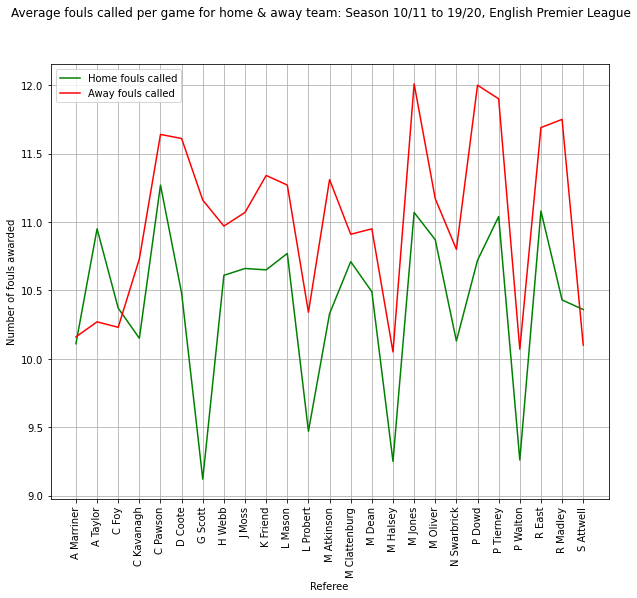

In [12]:
plt.figure(num=None, figsize=(10, 8), edgecolor='k')
plt.plot(avg_fouls_home, 'g',label='Home fouls called')
plt.plot(avg_fouls_away, 'r',label='Away fouls called')
plt.suptitle('Average fouls called per game for home & away team: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of fouls awarded')
plt.legend(loc='best')
plt.grid(True)

plt.show()

Here we can see that most referee's have a bias to call more fouls to the benefit of the home team than they do to the away team

How about yellow cards??

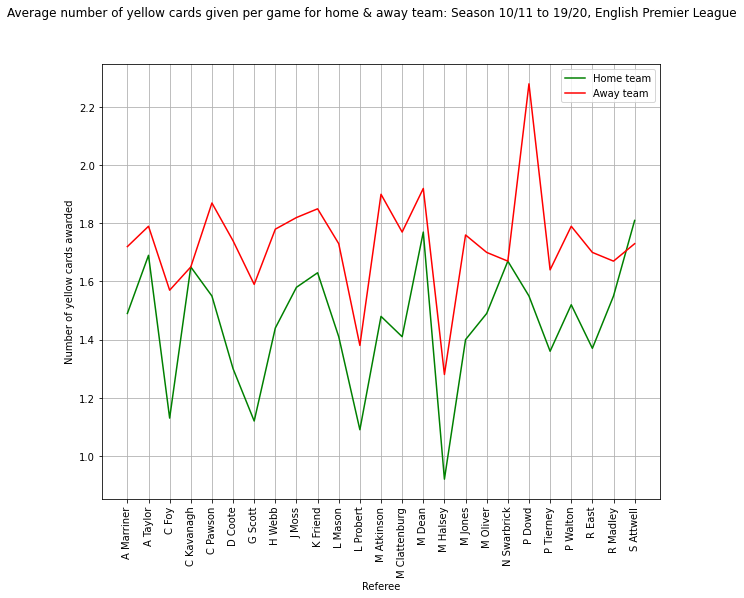

In [13]:
plt.figure(num=None, figsize=(10, 8), edgecolor='k')
plt.plot(avg_home_yellow_card, 'g',label='Home team')
plt.plot(avg_away_yellow_card, 'r',label='Away team')
plt.suptitle('Average number of yellow cards given per game for home & away team: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of yellow cards awarded')
plt.legend(loc='best')
plt.grid(True)

plt.show()

We can also see referee's tend to give more yellow cards to the away teams as well. 

Though the margins might seem small at the moment, over the course of a 38 game season, a 0.4 difference like we see with C.Foy can lead to an estimated 15 more yellow cards to away teams than home teams. This will impact results in the long term. 

<h4> Question 4: Did this bias sway results, that is can we see a trend where referee's who had a more disproportionate bias that favoured the home team led to better results for the home team?

In [14]:
#Tallying up the fulltime results into seperate lists here
away_win = []
home_win = []
draw = []

for i,val in data['FTR'].items():
    if val == 'A':
        away_win.append(data['Referee'][i])       
    elif val == 'H':
        home_win.append(data['Referee'][i])
    elif val == 'D':
        draw.append(data['Referee'][i])

In [15]:
away_win_vals = pd.DataFrame.from_dict(dict(Counter(away_win).most_common()),orient='index')
home_win_vals = pd.DataFrame.from_dict(dict(Counter(home_win).most_common()),orient='index')
draw_vals = pd.DataFrame.from_dict(dict(Counter(draw).most_common()),orient='index')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


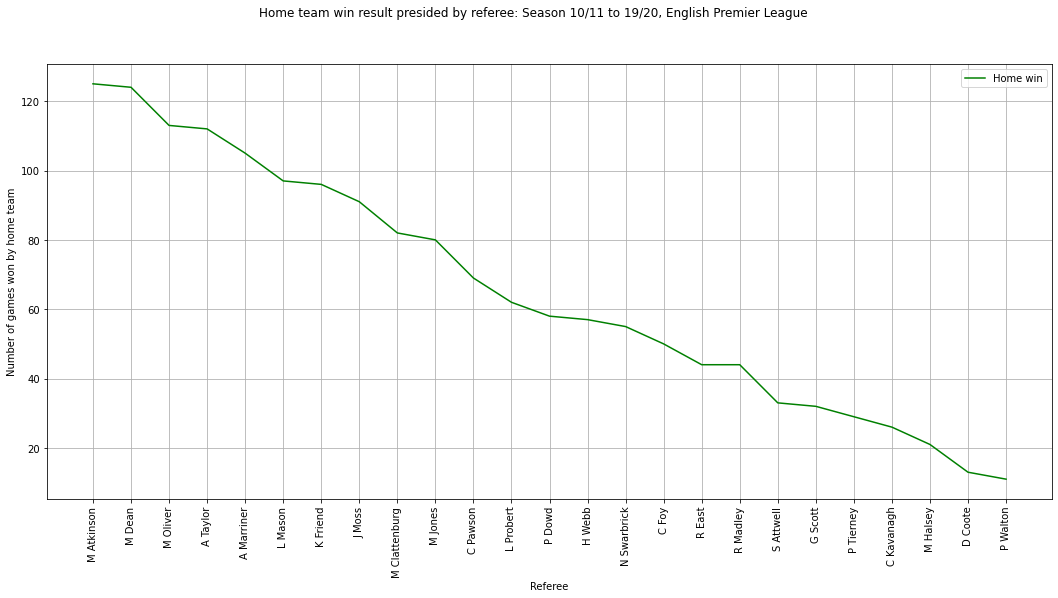

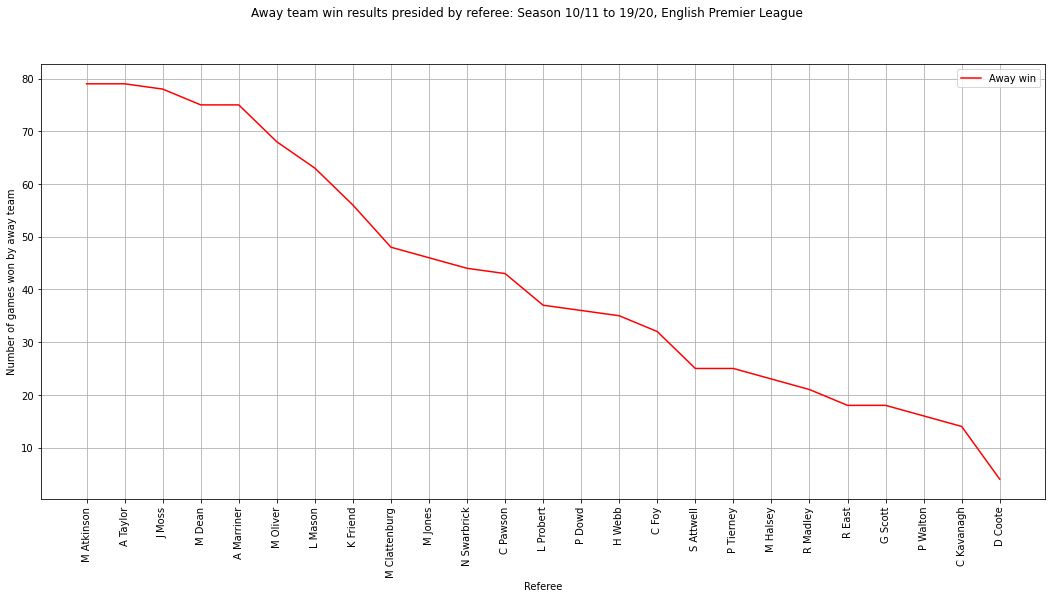

In [19]:
plt.figure(num=1, figsize=(18, 8), edgecolor='k')
plt.legend()
plt.plot(home_win_vals, 'g',label='Home win')
plt.suptitle('Home team win result presided by referee: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of games won by home team')
plt.legend(loc='best')
plt.grid(True)


plt.figure(num=2, figsize=(18, 8), edgecolor='k')
plt.legend()
plt.plot(away_win_vals, 'r',label='Away win')
plt.suptitle('Away team win results presided by referee: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of games won by away team')
plt.legend(loc='best')
plt.grid(True)

plt.show()

We can see that there is generally a trend of home teams winning games more often than the away side. This could be due to some unquantifiable factors such as fan influence/motivation, home advantage and/or play style.

Despite the observable trend, some referees can be seen to deviate slightly (J. Moss & P. Walton seem to preside over an equal number of home and away team wins, could they be outliers or are they really just unbiased referees?)

<h4>Question 5: Did teams get better goal advantages when playing at home or away and also with certain referees?

In [20]:
avg_home_goal = ref_data.agg({'FTHG': ['mean']}).round(2)
avg_away_goal = ref_data.agg({'FTAG': ['mean']}).round(2)
avg_total_goal = ref_data.agg({'TG': ['mean']}).round(2)

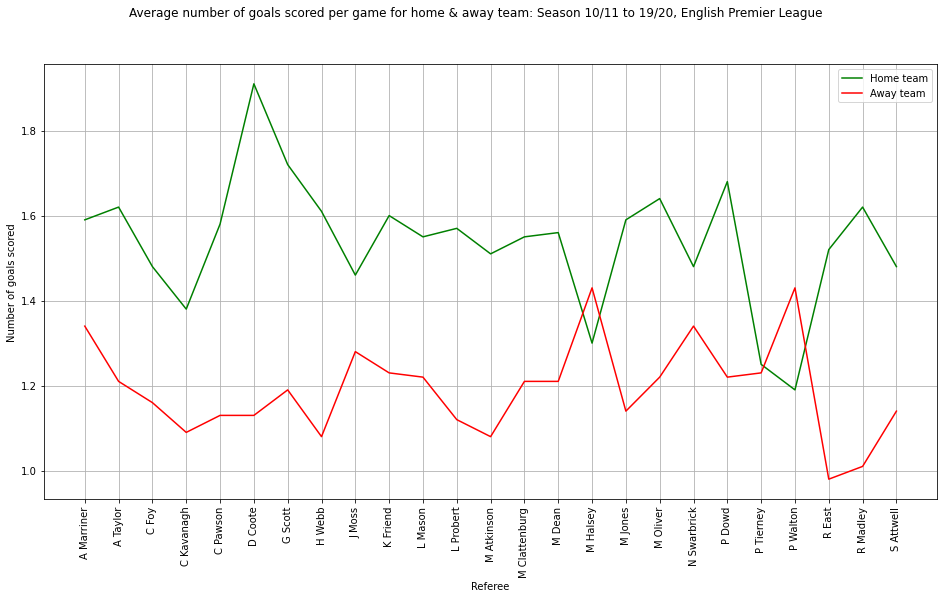

In [21]:
plt.figure(num=None, figsize=(16, 8), edgecolor='k')
plt.plot(avg_home_goal, 'g',label='Home team')
plt.plot(avg_away_goal, 'r',label='Away team')
plt.suptitle('Average number of goals scored per game for home & away team: Season 10/11 to 19/20, English Premier League')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of goals scored')
plt.legend(loc='best')
plt.grid(True)

plt.show()

Based on this graph, we can see about 3 referee's deviated from the trend. M. Halsey, P. Tierney and P. Walton over see games where the away team averaged scoring either more or just about the same number of goals as the home team, whilst D. Coote, R. East & R. Madley oversee games where the home teams score more than the away team with a much larger proportion than the other referees.

P. Walton was noted earlier as also having overseen more games where the away team won, his numbers are 11 Home wins, 15 Draws and 16 Away wins with the home team goals averaging at 1.19 vs 1.43 for the away team. For him the probability of a home win is 26% vs 38% for the away team over a record of 42 games.

<h4>While we might not be able to make any conclusive decision based on some unquantifiable and unpredictable factors that generally affect the result of soccer games, We can still gain some insight into some facts based on our analysis. These might include:

1. Home teams tend to score more and win more games than the away team regardless of which referee presides over the game.
2. Referee's tend to award call more fouls against and give more yellow cards to the away team.
    
